In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Datos/01_Optimización/Opt_dataset_4Objectives_CC.csv')

In [ ]:
df

In [7]:
nuevos_nombres = ['hm', 'am','bss','er', 'dsi', 'bst', 'TC', 'TcogPP', 'ned(x)', 'TrippPP(x)']

df.columns = nuevos_nombres

print("Nuevas columnas:")
print(df.columns)

df.head()

Nuevas columnas:
Index(['hm', 'am', 'bss', 'er', 'dsi', 'bst', 'TC', 'TcogPP', 'ned(x)',
       'TrippPP(x)'],
      dtype='object')


,hm,am,bss,er,dsi,bst,TC,TcogPP,ned(x),TrippPP(x)
0,3.2,0.95,1.2,2.4,46.5,5.1,7.543477,0.000590,-0.809682,0.002764
1,1.2,0.95,1.0,0.1,45.0,4.8,5.377060,0.206311,-0.918555,0.225746
2,1.2,0.75,1.3,0.4,48.0,4.8,5.048992,0.033728,-0.908788,0.060608
3,1.4,0.85,0.8,0.1,49.0,4.7,5.681045,0.238174,-0.917285,0.244254
4,1.2,0.90,2.0,0.1,45.0,4.8,5.177121,0.016478,-0.914834,0.054130


--- 1. INFORMACIÓN GENERAL Y TIPOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1700 non-null   float64
 1   x2      1700 non-null   float64
 2   x3      1700 non-null   float64
 3   x4      1700 non-null   float64
 4   x5      1700 non-null   float64
 5   x6      1700 non-null   float64
 6   y1      1700 non-null   float64
 7   y2      1700 non-null   float64
 8   y3      1700 non-null   float64
 9   y4      1700 non-null   float64
dtypes: float64(10)
memory usage: 132.9 KB

--- 2. ANÁLISIS DE NULOS ---
Empty DataFrame
Columns: [Total Nulos, % Nulos]
Index: []

--- 3. RESUMEN ESTADÍSTICO ---
                x1           x2           x3           x4           x5  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      2.161765     0.858353     1.404647     0.993353    46.152941   
std       1.106701     0.

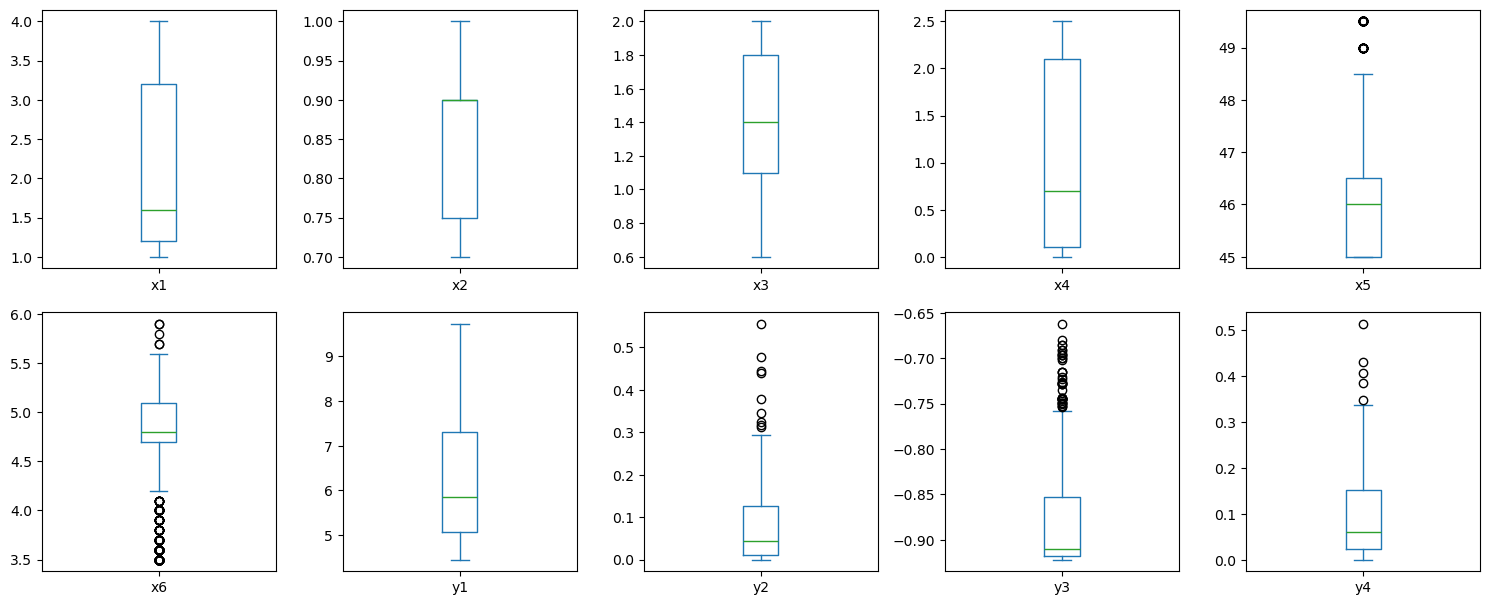

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ver tipos de datos y memoria
print("--- 1. INFORMACIÓN GENERAL Y TIPOS ---")
df.info() 

# 2. Análisis de Nulos (NAs)
print("\n--- 2. ANÁLISIS DE NULOS ---")
nulos = df.isna().sum()
porcentaje = (nulos / len(df)) * 100
tabla_nulos = pd.DataFrame({'Total Nulos': nulos, '% Nulos': porcentaje})
print(tabla_nulos[tabla_nulos['Total Nulos'] > 0])

# 3. Resumen Estadístico (Primera pista de Outliers)
print("\n--- 3. RESUMEN ESTADÍSTICO ---")
print(df.describe())

# 4. Conteo de Outliers (Método IQR - Rango Intercuartílico)
print("\n--- 4. CONTEO DE OUTLIERS (Método IQR) ---")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_count = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers_count[outliers_count > 0])

# 5. Visualización Rápida (Boxplot)
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

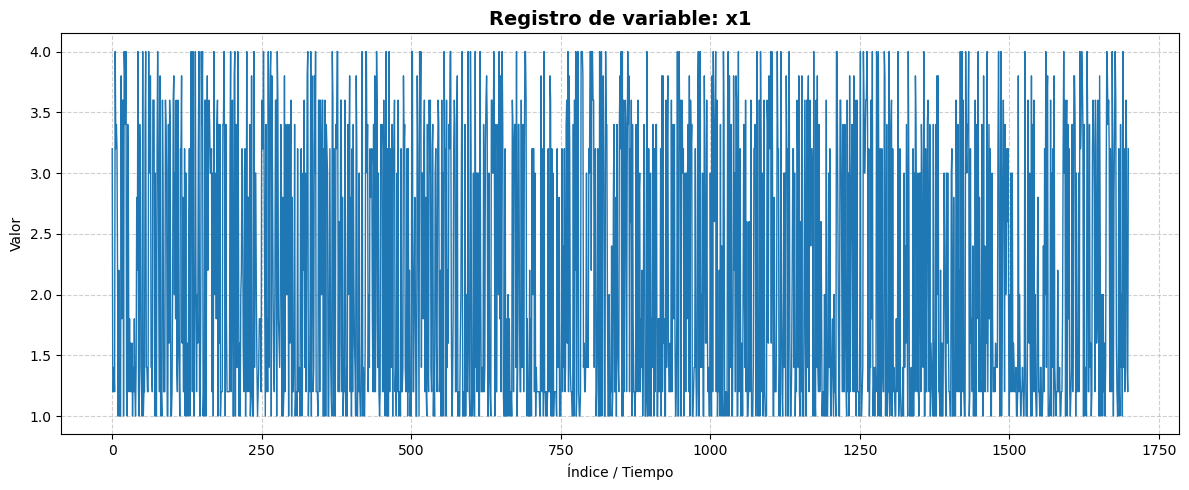

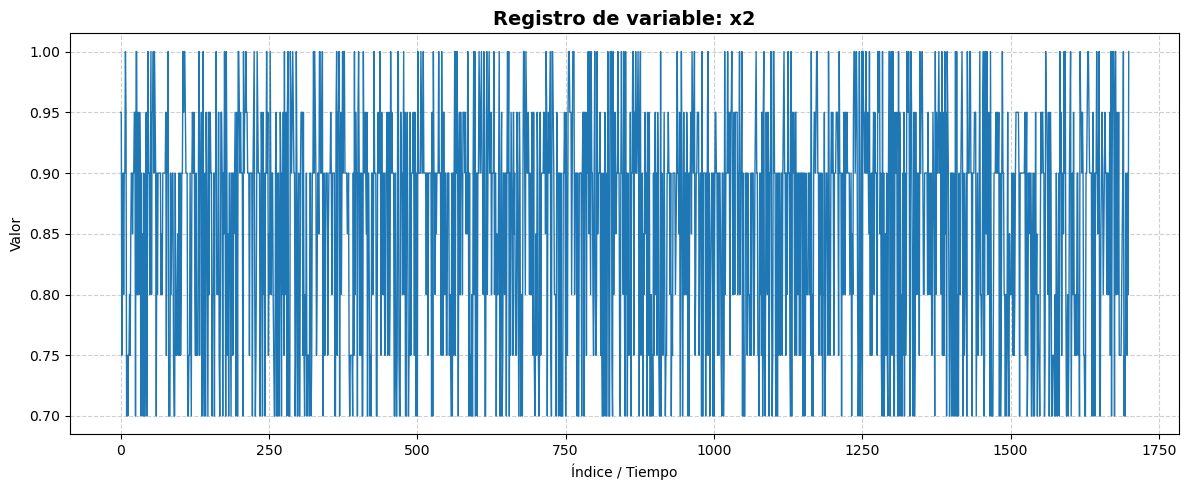

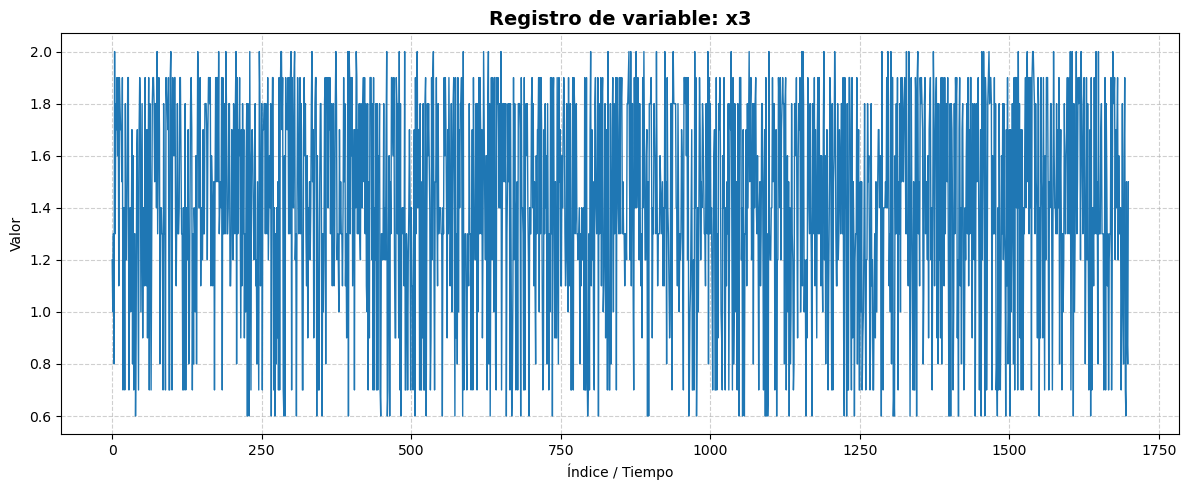

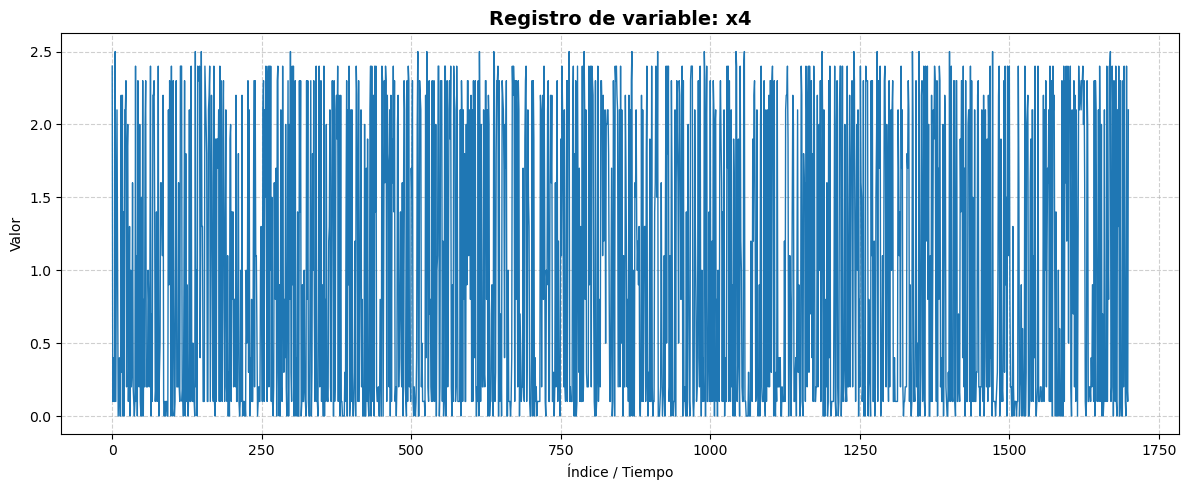

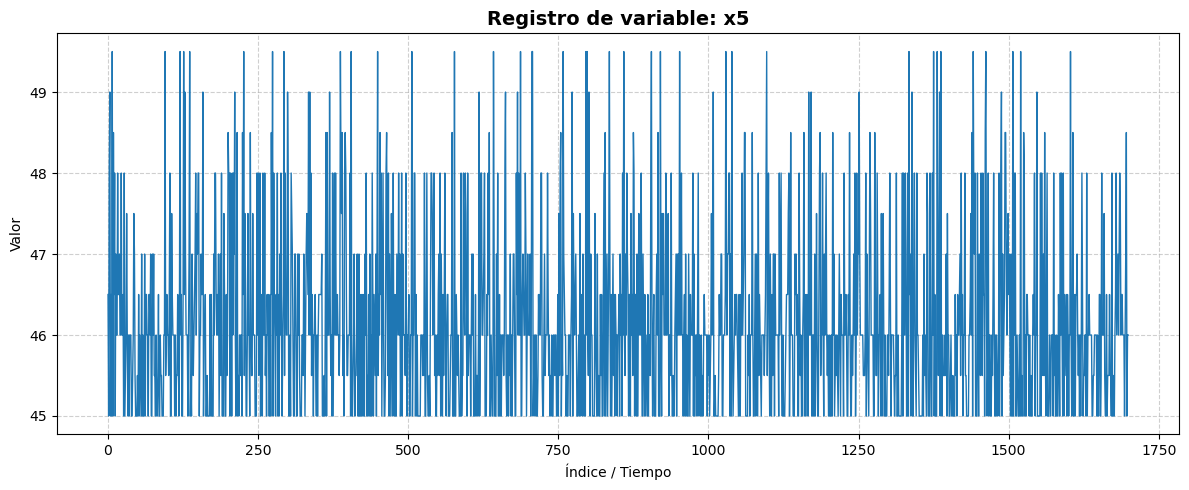

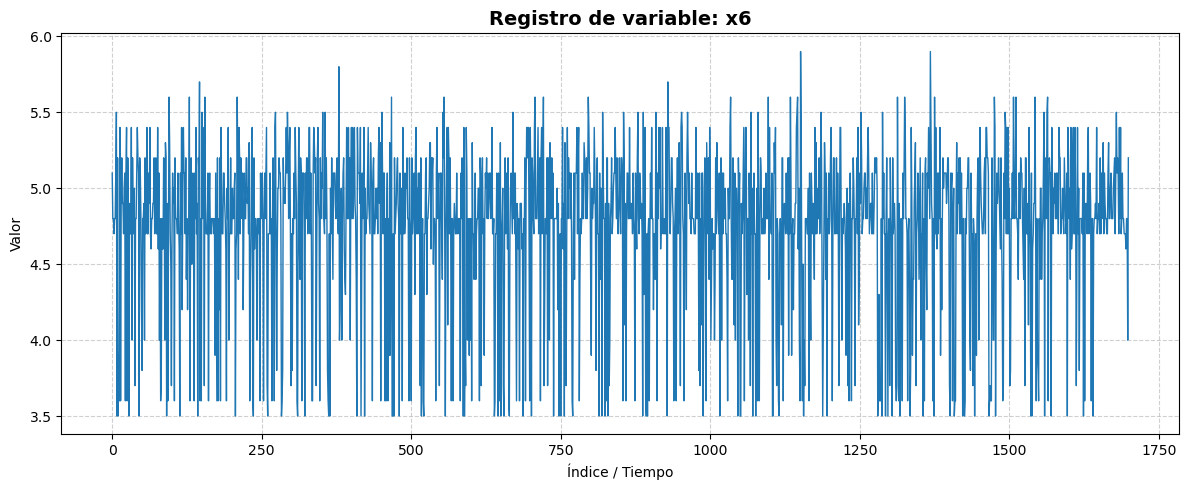

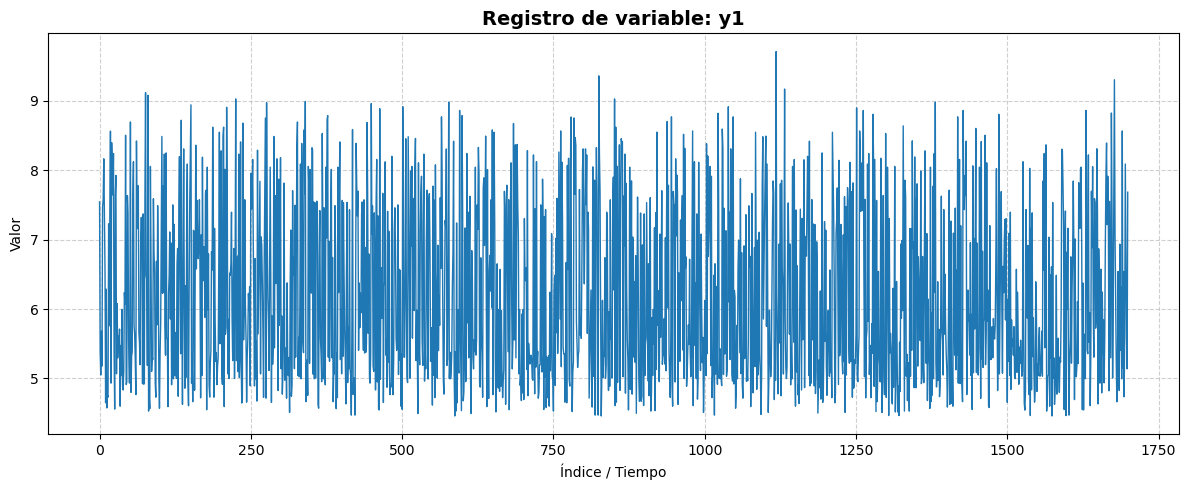

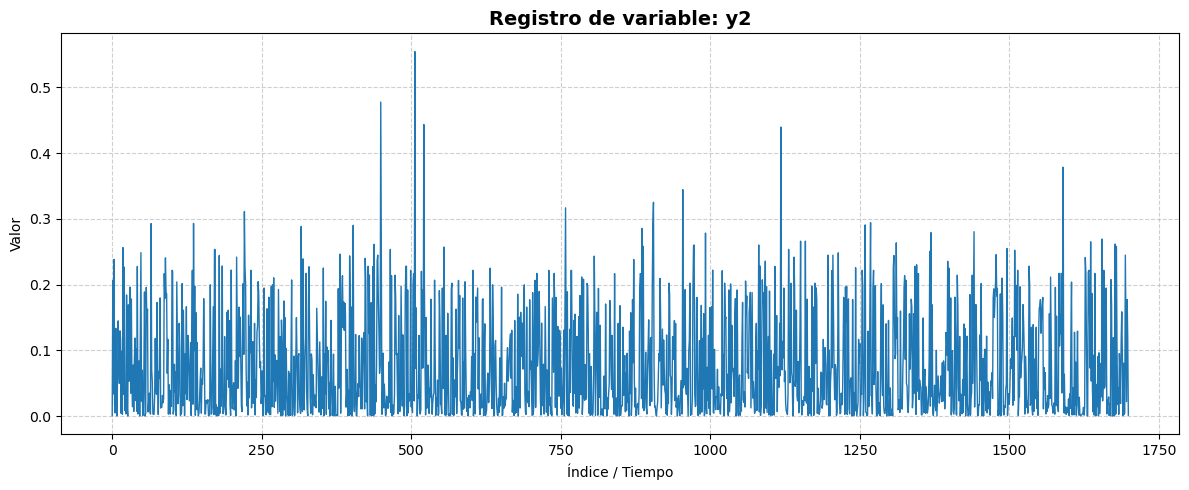

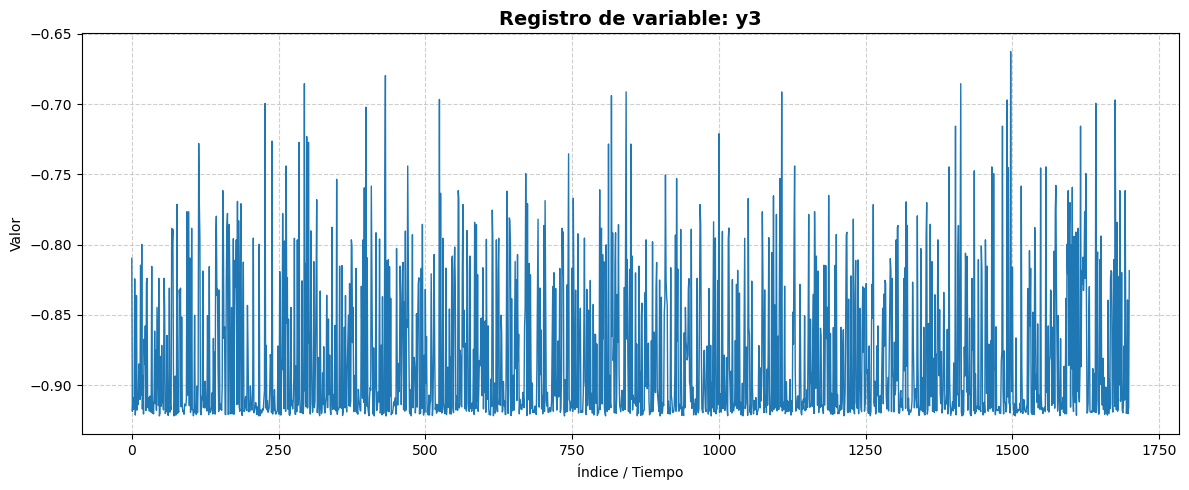

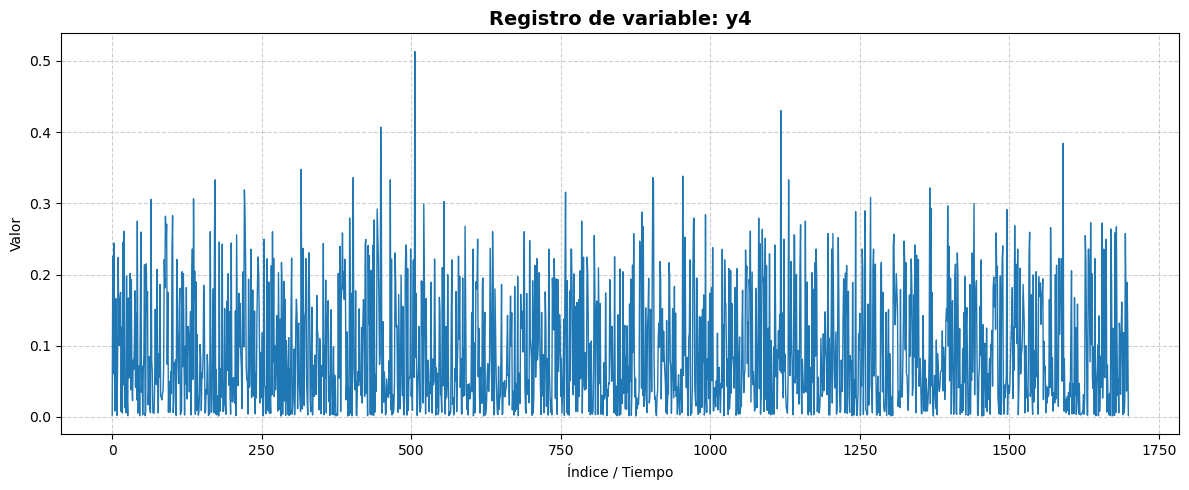

In [ ]:
import matplotlib.pyplot as plt

# 1. Identificamos las columnas numéricas (por seguridad)
cols_numericas = df.select_dtypes(include=['number']).columns

# 2. Iteramos: Una variable = Un gráfico
for col in cols_numericas:
    plt.figure(figsize=(12, 5))  
    
    plt.plot(df.index, df[col], color='tab:blue', linewidth=1)
    
    plt.title(f'Registro de variable: {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Índice / Tiempo')
    plt.ylabel('Valor')
    plt.grid(True, linestyle='--', alpha=0.6) 
    
    plt.tight_layout()
    plt.show()